<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-Store-df-Using-Acquire-Function" data-toc-modified-id="Acquire-Store-df-Using-Acquire-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire Store df Using Acquire Function</a></span></li><li><span><a href="#Exercises-with-Store-df" data-toc-modified-id="Exercises-with-Store-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercises with Store df</a></span></li><li><span><a href="#Date-Parts" data-toc-modified-id="Date-Parts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Date Parts</a></span></li><li><span><a href="#5.-Create-New-Calculated-Column-Using-.assign()" data-toc-modified-id="5.-Create-New-Calculated-Column-Using-.assign()-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>5. Create New Calculated Column Using .assign()</a></span></li><li><span><a href="#6.-Using-.diff()" data-toc-modified-id="6.-Using-.diff()-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>6. Using .diff()</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

import requests
import os
from datetime import timedelta, datetime as dt

import warnings
warnings.filterwarnings("ignore")

import acquire_walkthrough

## Acquire Store df Using Acquire Function

In [2]:
df = acquire_walkthrough.get_store_data()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


## Exercises with Store df

1. Convert date column to datetime format. <font color=red>(I have taken care of this in my acquire.)</font>



3. Set the index to be the datetime variable. <font color=red>(I have taken care of this in my acquire.)</font>



2. Plot the distribution of `sale_amount` and `item_price`.

In [3]:
df.item_price.describe()

count    913000.000000
mean          5.160400
std           2.737764
min           0.600000
25%           2.970000
50%           5.195000
75%           7.520000
max           9.640000
Name: item_price, dtype: float64

In [35]:
def hist_plot(df, col, bins):
    """
    function takes in a DataFrame, 
    a string for column name or list, and 
    integer for number of bins and
    displays a histogram of the column
    """
    plt.hist(df[col], bins=bins, color='thistle')
    plt.title('Distribution of ' + col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.show()

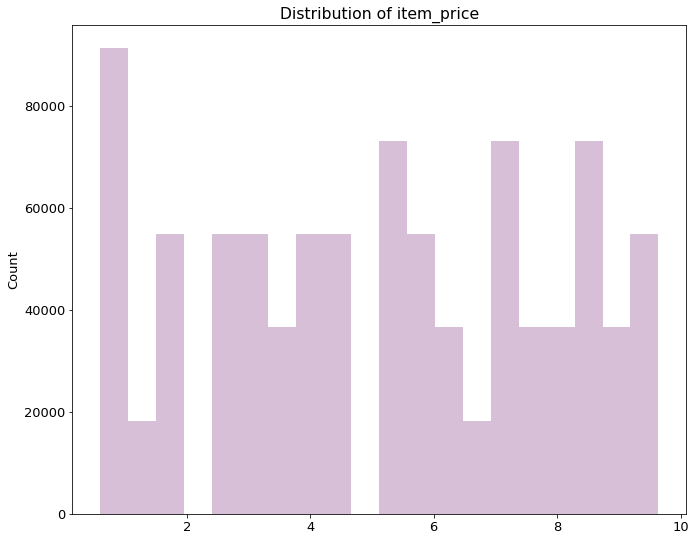

In [36]:
hist_plot(df=df, col='item_price', bins=20)

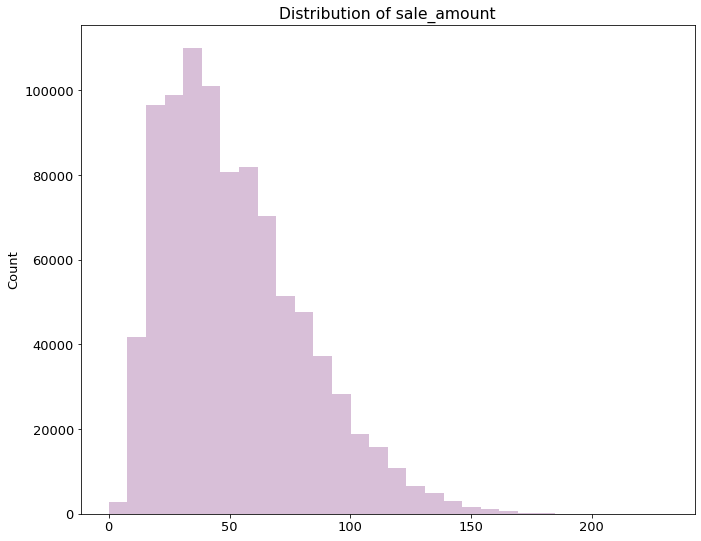

In [38]:
hist_plot(df=df, col='sale_amount', bins=30)

## Date Parts

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.


<div class="alert alert-block alert-danger"> If you have upgraded your pandas, use .day_name(), if not, .weekday_name. To check your pandas version, `pd.__version__` </div>


In [ ]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()
df.head(2)

## 5. Create New Calculated Column Using .assign()

`df = df.assign(new_col_name = your calculation)`

5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [ ]:
df = df.assign(sales_total = df.sale_amount * df.item_price)
df.head(3)

## 6. Using .diff()

6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.


In [ ]:
df = df.assign(sales_diff = df.sales_total.diff(periods=1))
df.head(2)